In [1]:
from plotnine import *
from sklearn.neighbors import KernelDensity
from scipy import interpolate
import pandas as pd
import numpy as np
import joypy
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.rc('font', family='Times New Roman')


df = pd.read_csv("lincoln_weather.csv")
Categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=Categories, ordered=True)
df

,CST,Max.Temperature..F.,Mean.Temperature..F.,Min.Temperature..F.,Max.Dew.Point..F.,Mean.Dew.Point..F.,Min.Dewpoint..F.,Max.Humidity,Mean.Humidity,Min.Humidity,...,Mean.Visibility..Miles.,Min.Visibility..Miles.,Max.Wind.Speed..MPH.,Mean.Wind.Speed.MPH.,Max.Gust.Speed..MPH.,Precipitation..In.,CloudCover,Events,WindDir..Degrees.,Month
0,2016/1/1,37,24,11,19.0,13.0,8.0,88.0,68.0,47.0,...,10.0,10.0,20.0,9.0,23.0,0,0.0,NaN,280.0,January
1,2016/1/2,41,23,5,22.0,14.0,4.0,100.0,72.0,44.0,...,10.0,10.0,15.0,6.0,18.0,0,0.0,NaN,312.0,January
2,2016/1/3,37,23,8,23.0,15.0,8.0,92.0,73.0,54.0,...,10.0,10.0,13.0,5.0,14.0,0,0.0,NaN,330.0,January
3,2016/1/4,30,17,4,24.0,13.0,2.0,92.0,82.0,72.0,...,9.0,6.0,17.0,7.0,23.0,0,1.0,NaN,155.0,January
4,2016/1/5,38,29,19,29.0,25.0,19.0,96.0,83.0,70.0,...,8.0,5.0,22.0,13.0,28.0,0,4.0,NaN,178.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2016/12/27,48,29,10,22.0,16.0,7.0,84.0,55.0,25.0,...,10.0,10.0,18.0,6.0,22.0,0,0.0,Rain,212.0,December
362,2016/12/28,49,36,22,22.0,16.0,7.0,84.0,52.0,19.0,...,10.0,10.0,26.0,12.0,32.0,0,0.0,NaN,306.0,December
363,2016/12/29,44,30,16,12.0,9.0,5.0,62.0,41.0,20.0,...,10.0,10.0,30.0,16.0,38.0,0,0.0,NaN,301.0,December
364,2016/12/30,62,38,14,23.0,15.0,9.0,75.0,46.0,17.0,...,10.0,2.0,20.0,7.0,24.0,0,0.0,NaN,292.0,December


Text(0, 0.5, 'Month')

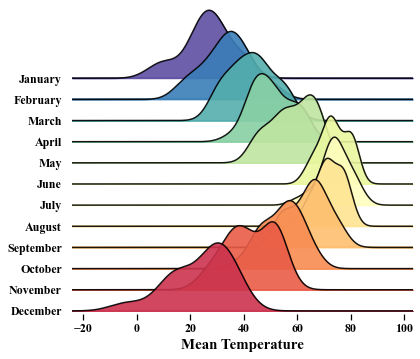

In [2]:
# ----------------------------------(a) ------------------------------------------
sns.set_context("notebook", font_scale=1.5,
                rc={'font.size': 12,
                    'axes.labelsize': 20, 'legend.fontsize': 15,
                    'xtick.labelsize': 15, 'ytick.labelsize': 15})

fig, axes = joypy.joyplot(df, column=["Mean.Temperature..F."],
                          by="Month", ylim='own', colormap=cm.Spectral_r,  # color='#FF8B19',
                          # hist=True,bins=30,
                          alpha=0.9, figsize=(6, 5))
plt.xlabel("Mean Temperature", {'size': 15})
plt.ylabel("Month", {'size': 15})
#axes.set_axis_labels("Mean Temperature", "Month")
# plt.show()
# fig.savefig('joyplot.pdf')


In [3]:
# ----------------------------------(b) ------------------------------------------
#import numpy as np
# 从scipy库中导入插值需要的方法 interpolate


def df_split(df, f):
    list_f = np.unique(df[f])
    splitdata = []
    for i in list_f:
        splitdata.append(df[df[f] == i])
    return splitdata


# 定义函数 x:横坐标列表 y:纵坐标列表 kind:插值方式
dt = df[["Month", "Mean.Temperature..F."]]
# dt=dt.set_index(["Month"])
splitdata = df_split(dt, f='Month')

xmax = max(dt["Mean.Temperature..F."])*1.1
xmin = min(dt["Mean.Temperature..F."])*0.9


N = len(splitdata)
labels_y = np.unique(df['Month'])

mydata = pd.DataFrame(columns=["variable", "x", "y"])  # 创建空的Data.Frame

X_plot = np.linspace(xmin, xmax, 200)[:, np.newaxis]

for i in range(0, N):
    X = np.array(splitdata[i]["Mean.Temperature..F."])[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=3.37).fit(X)
    Y_dens = np.exp(kde.score_samples(X_plot))
    mydata_temp = pd.DataFrame({"variable": np.repeat(splitdata[i]['Month'][0], len(X_plot)),
                                "x": X_plot.flatten(), "y": Y_dens})
    mydata = mydata.append(mydata_temp)

Categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
mydata['variable'] = pd.Categorical(
    mydata['variable'], categories=Categories, ordered=True)
mydata['num_variable'] = pd.factorize(mydata['variable'], sort=True)[0]

Step = max(mydata['y'])*0.3
mydata['offest'] = -mydata['num_variable']*Step
mydata['density_offest'] = mydata['offest']+mydata['y']
mydata


KeyError: 0

In [4]:
p = (ggplot())
for i in range(0, N):
    p = (p + geom_linerange(mydata[mydata['num_variable'] == i],
                            aes(x='x', ymin='offest', ymax='density_offest',
                                group='variable', color='y'),
                            size=1, alpha=1) +
         geom_line(mydata[mydata['num_variable'] == i],
                   aes(x='x', y='density_offest'), color="black", size=0.5))

p = (p+scale_color_cmap(name='Spectral_r') +
     scale_y_continuous(breaks=np.arange(0, -Step*N, -Step),
                        # limits=(max(mydata['density_offest']),-Step*(N-1)),
                        labels=Categories) +
     xlab("Mean Temperature") +
     ylab("Month") +
     guides(color=guide_colorbar(title="Density",
                                 barwidth=15,
                                 barheight=70)) +
     theme_classic() +
     theme(
    panel_background=element_rect(fill="white"),
    panel_grid_major_x=element_line(colour="#E5E5E5", size=.75),
    panel_grid_major_y=element_line(colour="grey", size=.25),
    axis_line=element_blank(),
    text=element_text(size=12, colour="black"),
    plot_title=element_text(size=15, hjust=.5),
    legend_position="right",

    aspect_ratio=1.05,
    dpi=100,
    figure_size=(5, 5)
))
print(p)
# p.save("joyplot2.pdf")


KeyError: 'num_variable'